# 卒業研究1：データの可視化と分析
#### 坂西和也

In [392]:
import pandas as pd
import matplotlib.pyplot as plt

In [393]:
# CSVファイルを読み込む
data_path = '/home/mori/banzai/banzai_study/masuda/data.csv'
data = pd.read_csv(data_path)

(増田先生より)5列のデータで、最初の列がx軸(速度)、第2列以降がy軸の透過率です。

第2列が本来の(ものに近い)データ、第3-5列が実験条件による「望ましくない影響」を受けてしまったデータです。

In [394]:
data

,Velocity (mm/s),rEuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,1.000568,0.999169,1.056376,1.031597
1,-19.685039,1.000474,1.006236,1.060518,1.024384
2,-19.370079,1.000602,1.013526,1.062131,1.014038
3,-19.055118,1.000753,1.020716,1.060919,1.001979
4,-18.740157,1.000707,1.027347,1.056806,0.989778
...,...,...,...,...,...
123,18.740157,1.000707,1.027347,1.056806,0.989778
124,19.055118,1.000753,1.020716,1.060919,1.001979
125,19.370079,1.000602,1.013526,1.062131,1.014038
126,19.685039,1.000474,1.006236,1.060518,1.024384


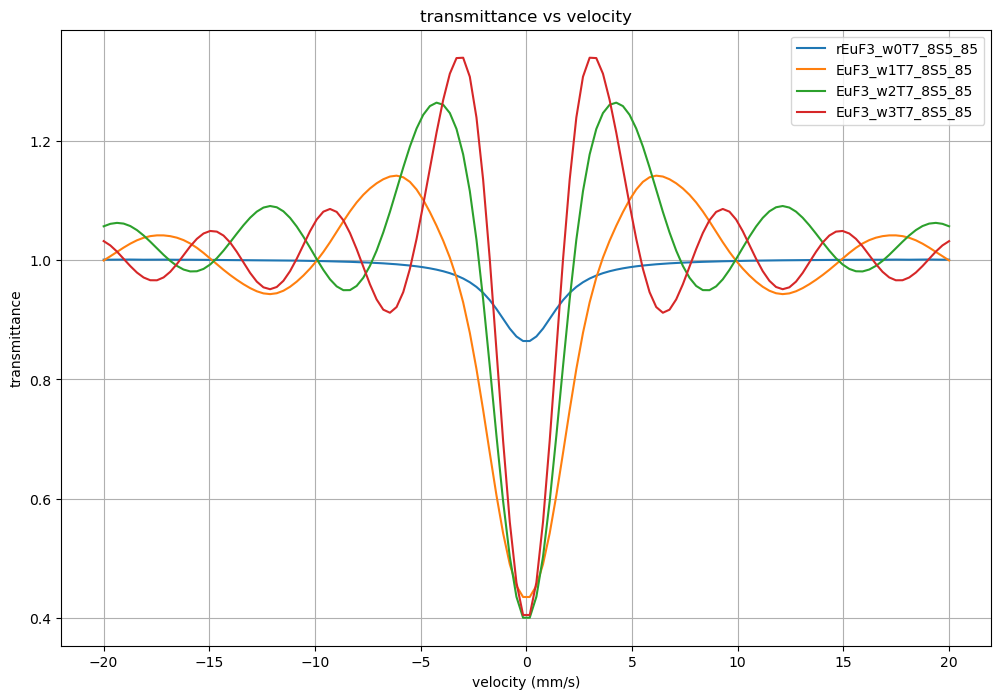

In [395]:
# データをプロット
plt.figure(figsize=(12, 8))
for column in data.columns[1:]:
    plt.plot(data['Velocity (mm/s)'], data[column], label=column)
    
plt.title('transmittance vs velocity')
plt.xlabel('velocity (mm/s)')
plt.ylabel('transmittance')
plt.legend()
plt.grid(True)
plt.show()
# transmittance:透過率

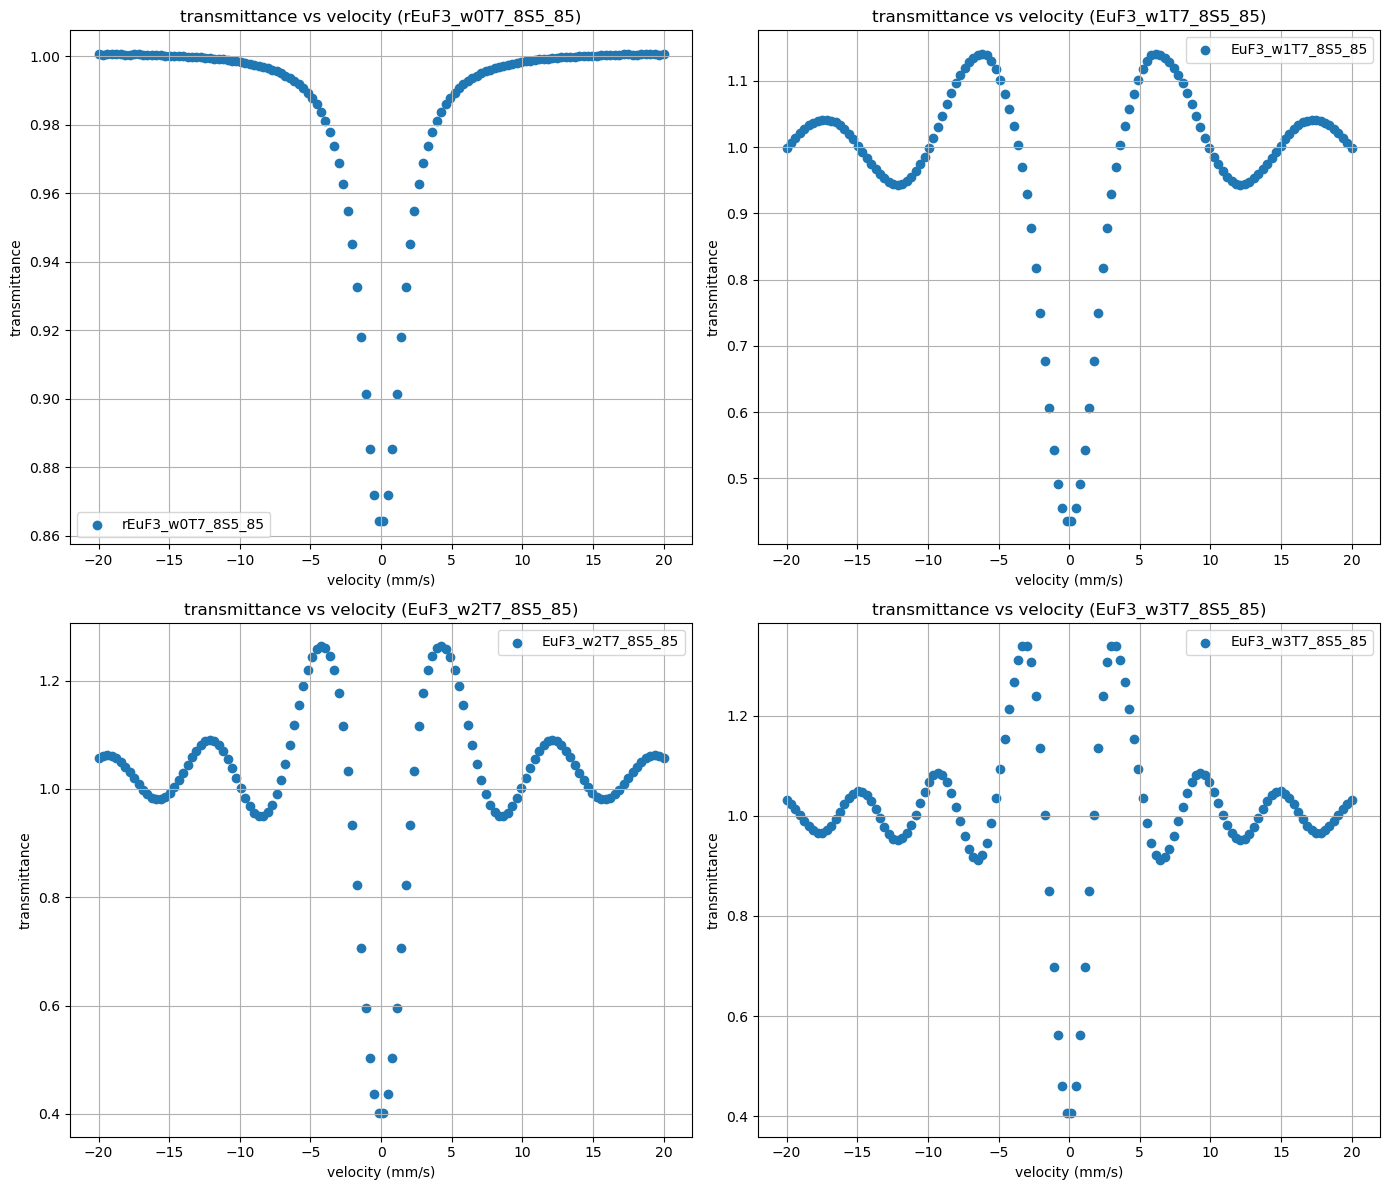

In [396]:
# 2列から5列までのデータをそれぞれ散布図でプロット
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.ravel()

for idx, column in enumerate(data.columns[1:]):
    axes[idx].scatter(data['Velocity (mm/s)'], data[column], label=column)
    axes[idx].set_title(f'transmittance vs velocity ({column})')
    axes[idx].set_xlabel('velocity (mm/s)')
    axes[idx].set_ylabel('transmittance')
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()

## ランダムノイズを付加した場合の再現性（テスト）
(増田先生より)この第2から第5列に適当なランダムノイズ(1-10%程度)を加えて、元データを再現できるかでも良いと思います。

### ランダムノイズの付加

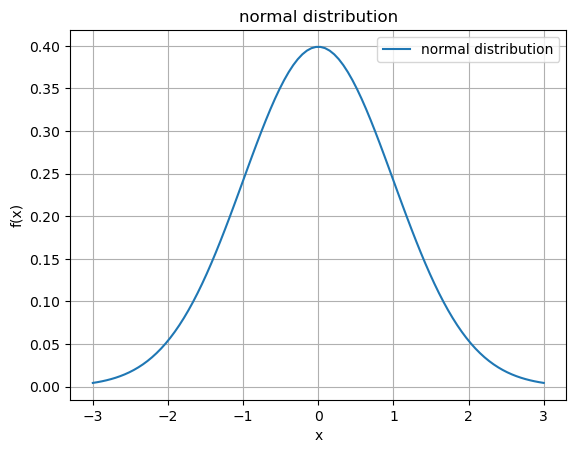

In [397]:
# 正規分布の形状
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 平均値と標準偏差を指定
mu = 0  # 平均値
sigma = 1  # 標準偏差

# x軸の値を生成
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# 正規分布の確率密度関数を計算
pdf = norm.pdf(x, mu, sigma)

# プロット
plt.plot(x, pdf, label='normal distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('normal distribution')
plt.legend()
plt.grid(True)
plt.show()


In [398]:
x = data['Velocity (mm/s)']
type(x)

pandas.core.series.Series

In [399]:
l = len(x)
print(l)

128


In [400]:
data.columns

Index(['Velocity (mm/s)', 'rEuF3_w0T7_8S5_85', 'EuF3_w1T7_8S5_85',
       'EuF3_w2T7_8S5_85', 'EuF3_w3T7_8S5_85'],
      dtype='object')

In [401]:
# 正規ノイズをデータに加える

import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(0)

random0 = np.random.normal(loc = 0.0 , scale =  0.01, size = l)
random1 = np.random.normal(loc = 0.0 , scale =  0.1, size = l)

y1 = data['rEuF3_w0T7_8S5_85'] + random0
y2 = data['EuF3_w1T7_8S5_85'] + random1
y3 = data['EuF3_w2T7_8S5_85'] + random1
y4 = data['EuF3_w3T7_8S5_85'] + random1

In [402]:
import pandas as pd

data_error1 = pd.DataFrame({
    'Velocity (mm/s)'   : x,
    'rEuF3_w0T7_8S5_85' : y1,
    'EuF3_w1T7_8S5_85'  : y2,
    'EuF3_w2T7_8S5_85'  : y3,
    'EuF3_w3T7_8S5_85'  : y4,
})

In [403]:
data_error1

,Velocity (mm/s),rEuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,1.018209,1.066399,1.123605,1.098826
1,-19.685039,1.004475,1.046982,1.101264,1.065131
2,-19.370079,1.010389,0.936535,0.985139,0.937047
3,-19.055118,1.023162,1.074641,1.114844,1.055904
4,-18.740157,1.019383,0.959914,0.989372,0.922345
...,...,...,...,...,...
123,18.740157,1.013971,0.969769,0.999227,0.932200
124,19.055118,0.993808,1.034911,1.075115,1.016175
125,19.370079,0.999106,0.981594,1.030198,0.982105
126,19.685039,0.996122,1.075389,1.129672,1.093538


In [404]:
data_error1.to_csv('data_error1.csv', index=False)

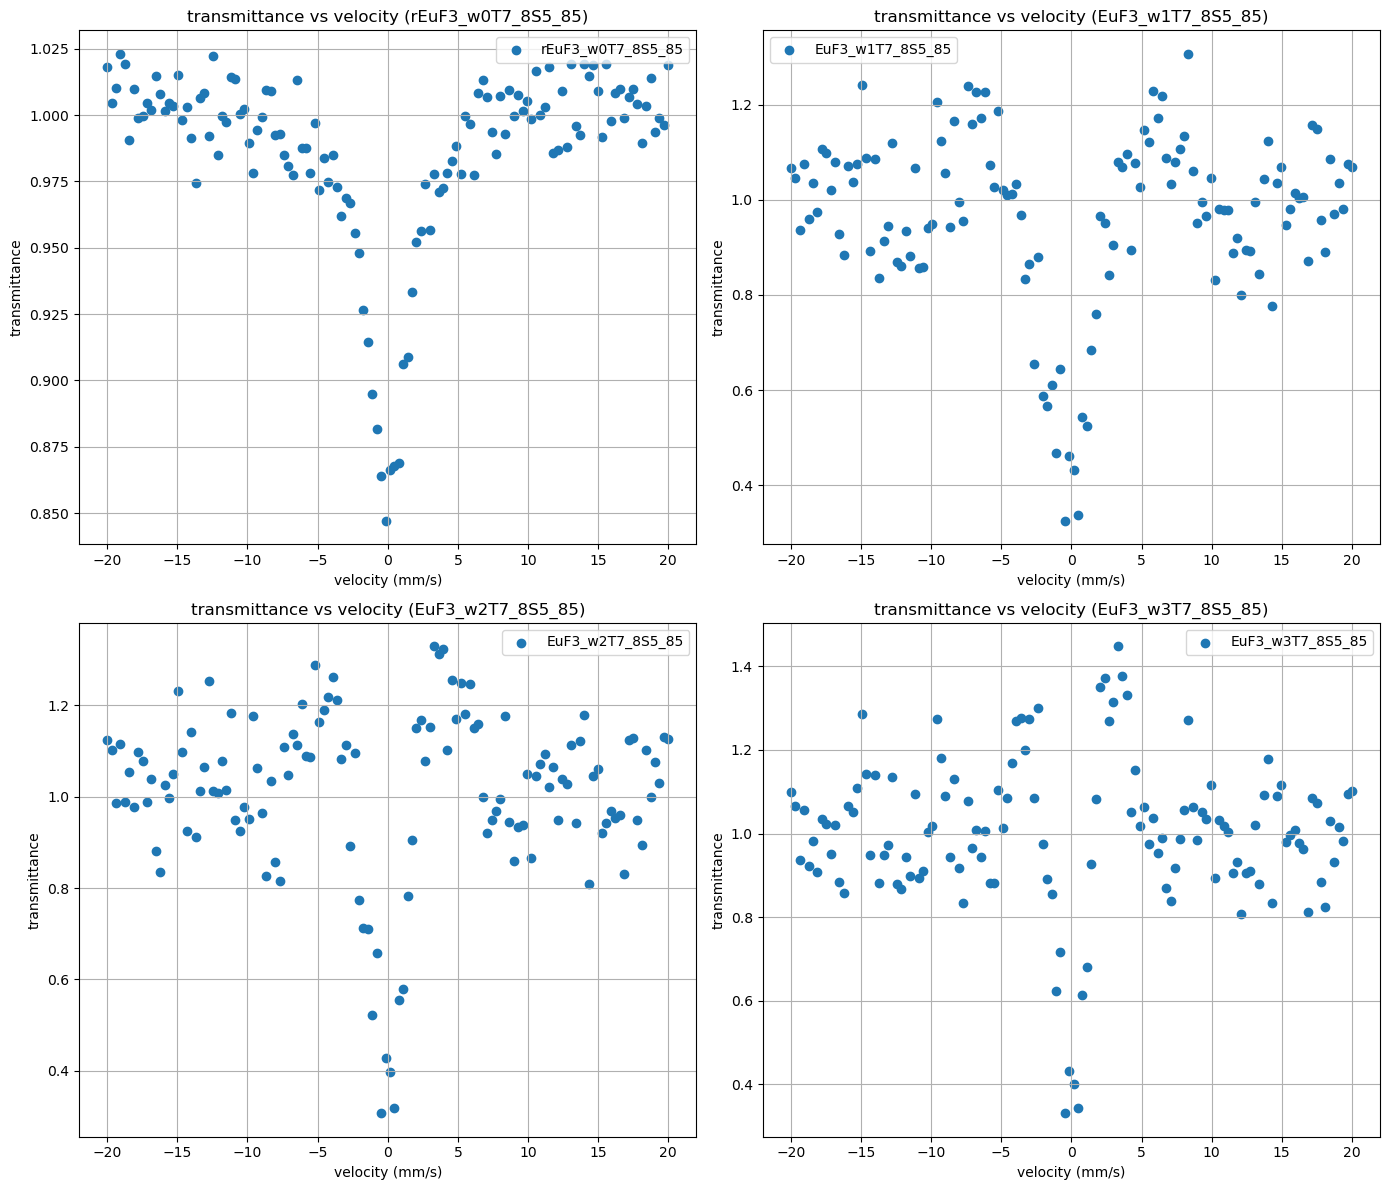

In [405]:
# 2列から5列までのデータをそれぞれ散布図でプロット
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.ravel()

for idx, column in enumerate(data_error1.columns[1:]):
    axes[idx].scatter(data_error1['Velocity (mm/s)'], data_error1[column], label=column)
    axes[idx].set_title(f'transmittance vs velocity ({column})')
    axes[idx].set_xlabel('velocity (mm/s)')
    axes[idx].set_ylabel('transmittance')
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()

### ガウス過程回帰で再現

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0004   7.458050e+05   6.570333e+10 
    00s01  0014  -3.220534e+02   1.755680e+01 
    00s02  0020  -3.223477e+02   9.436028e-02 
    00s02  0024  -3.223506e+02   5.801722e-10 
Runtime:     00s02
Optimization status: Converged



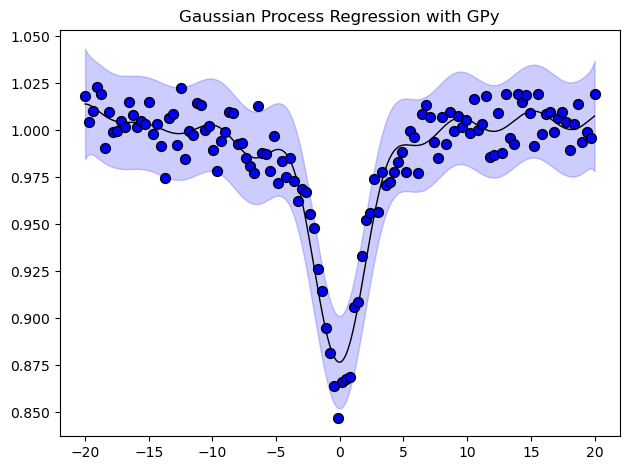

In [406]:
# rEuF3_w0T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error1.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy")
plt.tight_layout()
plt.show()


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0009  -8.691953e+01   3.942864e-01 
    00s03  0013  -8.699226e+01   2.594035e-03 
    00s04  0017  -8.699228e+01   8.172364e-10 
Runtime:     00s04
Optimization status: Converged



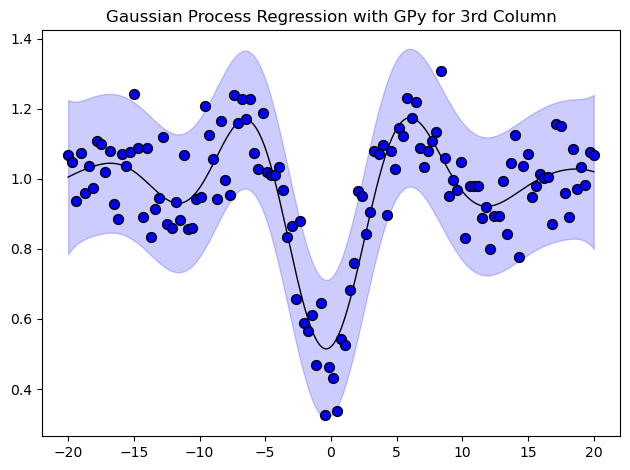

In [407]:
# EuF3_w1T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error1.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 2].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 3rd Column")
plt.tight_layout()
plt.show()


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0007  -7.413808e+01   1.240004e+02 
    00s01  0010  -7.707559e+01   5.635195e-02 
    00s01  0014  -7.707911e+01   2.953848e-03 
    00s02  0018  -7.707915e+01   2.634064e-10 
Runtime:     00s02
Optimization status: Converged



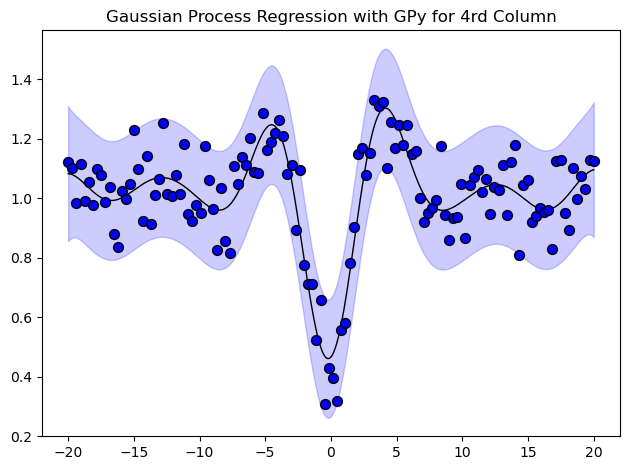

In [408]:
# EuF3_w2T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error1.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 3].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 4rd Column")
plt.tight_layout()
plt.show()


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0003  -6.034596e+01   5.909839e+02 
    00s01  0008  -6.875176e+01   5.015928e-01 
    00s01  0013  -6.875722e+01   1.098018e-04 
    00s02  0017  -6.875722e+01   5.460109e-11 
Runtime:     00s02
Optimization status: Converged



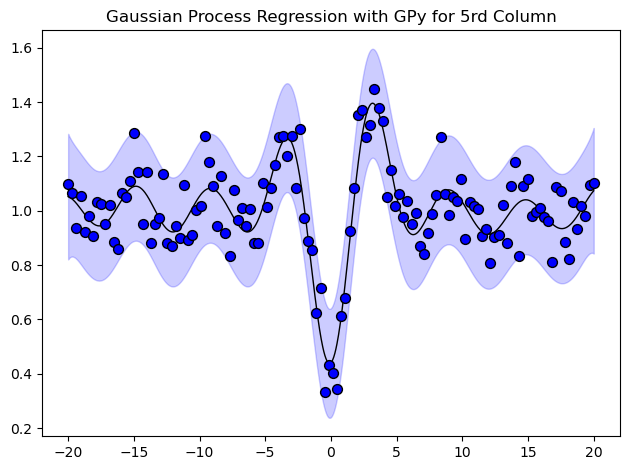

In [409]:
# EuF3_w3T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error1.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 4].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 5rd Column")
plt.tight_layout()
plt.show()


## 正規乱数の標準偏差を変えて限界を調べる

### ランダムノイズ付加
縦軸1.0とピークとなる値との差の半分の位置を標準偏差とした．

1.$\sigma = 0.07$

2.$\sigma = 0.3$

In [410]:
# CSVファイルを読み込む
data_path = '/home/mori/banzai/banzai_study/masuda/data.csv'
data = pd.read_csv(data_path)

In [411]:
# 正規ノイズをデータに加える

import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(0)

random0 = np.random.normal(loc = 0.0 , scale =  0.07, size = l)
random1 = np.random.normal(loc = 0.0 , scale =  0.3, size = l)

y1 = data['rEuF3_w0T7_8S5_85'] + random0
y2 = data['EuF3_w1T7_8S5_85'] + random1
y3 = data['EuF3_w2T7_8S5_85'] + random1
y4 = data['EuF3_w3T7_8S5_85'] + random1

In [412]:
import pandas as pd

data_error_limit = pd.DataFrame({
    'Velocity (mm/s)'   : x,
    'rEuF3_w0T7_8S5_85' : y1,
    'EuF3_w1T7_8S5_85'  : y2,
    'EuF3_w2T7_8S5_85'  : y3,
    'EuF3_w3T7_8S5_85'  : y4,
})

In [413]:
data_error_limit.to_csv('data_error_limit.csv', index=False)

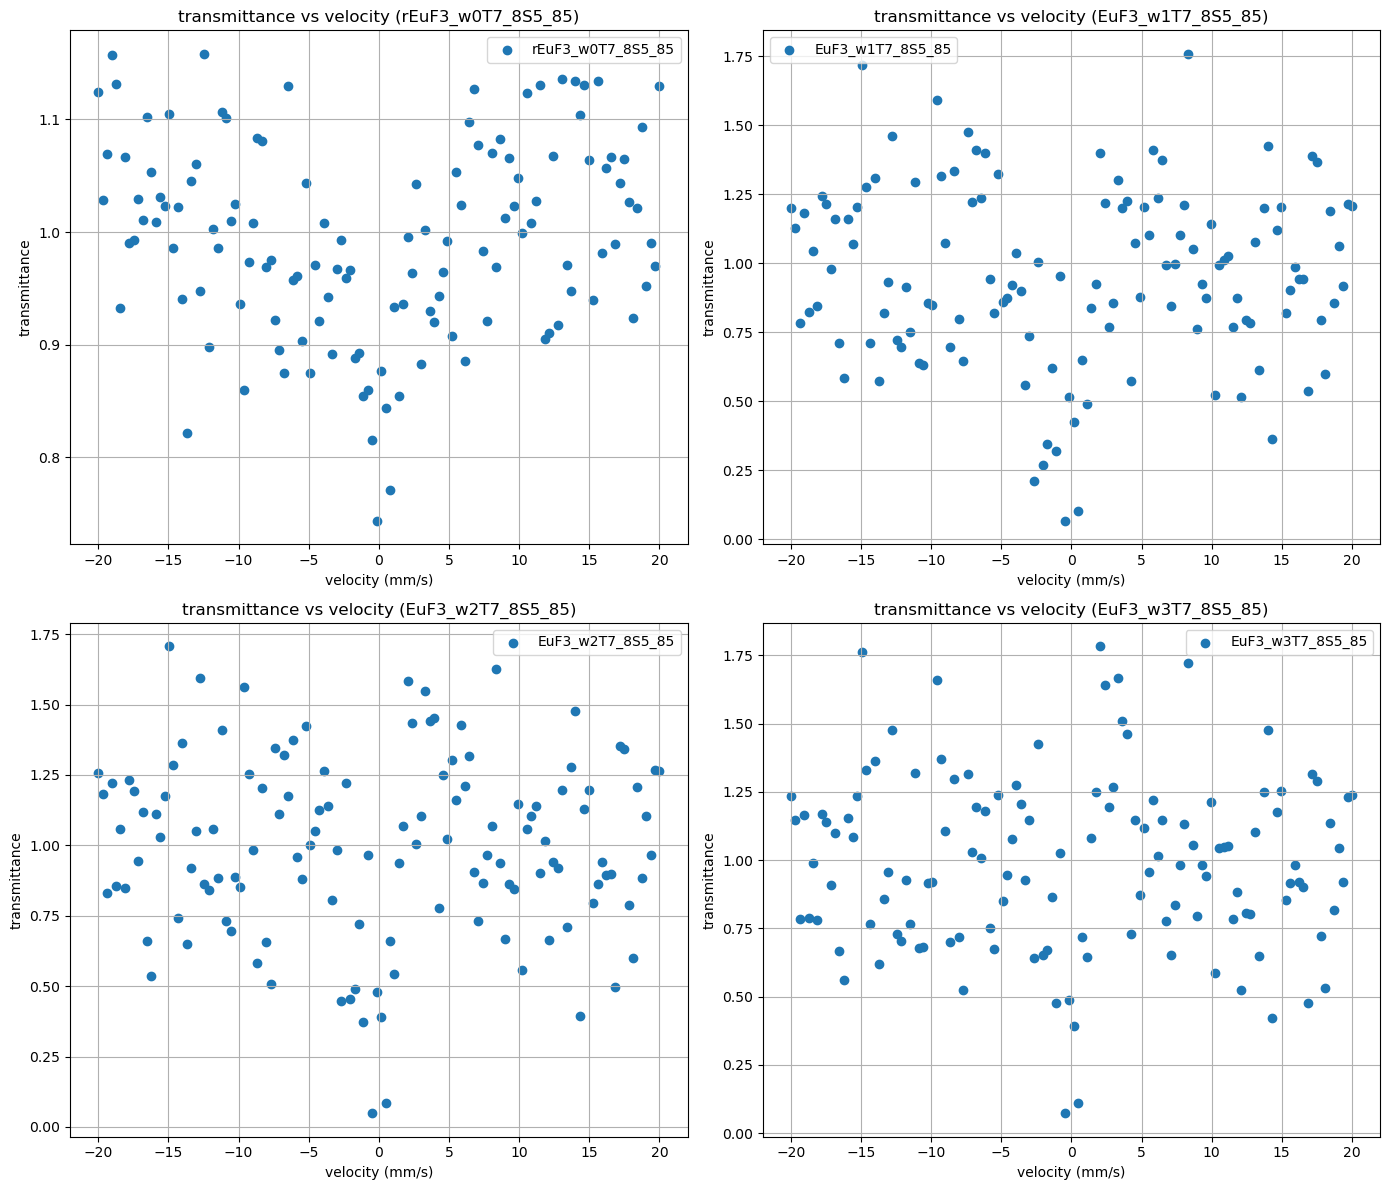

In [414]:
# 2列から5列までのデータをそれぞれ散布図でプロット
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.ravel()

for idx, column in enumerate(data_error_limit.columns[1:]):
    axes[idx].scatter(data_error_limit['Velocity (mm/s)'], data_error_limit[column], label=column)
    axes[idx].set_title(f'transmittance vs velocity ({column})')
    axes[idx].set_xlabel('velocity (mm/s)')
    axes[idx].set_ylabel('transmittance')
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()

### ガウス過程回帰で再現

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0004   2.005210e+07   3.999162e+13 
    00s01  0014  -1.350159e+02   1.239082e-01 
    00s02  0020  -1.372650e+02   7.577770e-03 
    00s03  0025  -1.372660e+02   5.363407e-10 
Runtime:     00s03
Optimization status: Converged



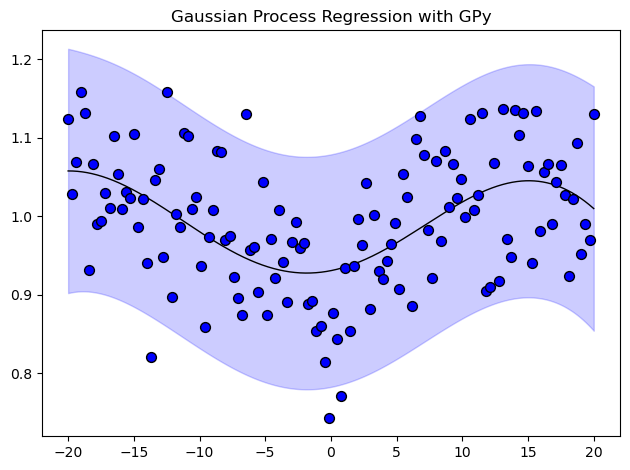

In [415]:
# rEuF3_w0T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error_limit.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy")
plt.tight_layout()
plt.show()

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s01  0008   3.875769e+01   7.823791e+00 
    00s01  0012   3.705892e+01   5.710441e-07 
    00s02  0014   3.705892e+01   4.012259e-10 
Runtime:     00s02
Optimization status: Converged



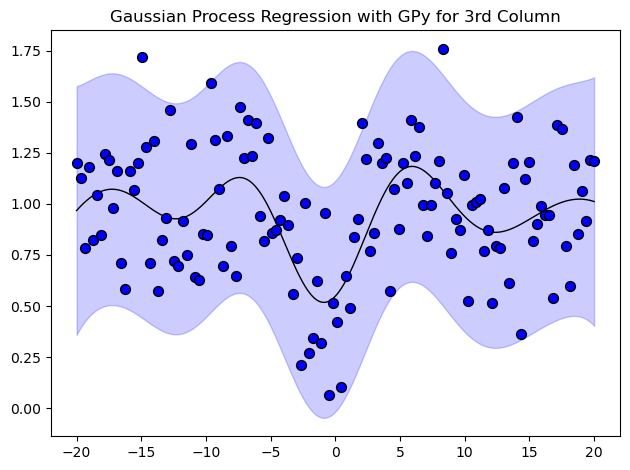

In [416]:
# EuF3_w1T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error_limit.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 2].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 3rd Column")
plt.tight_layout()
plt.show()

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s01  0009   4.180822e+01   2.363632e-01 
    00s01  0012   4.176755e+01   1.138755e-06 
    00s02  0015   4.176755e+01   1.428353e-12 
Runtime:     00s02
Optimization status: Converged



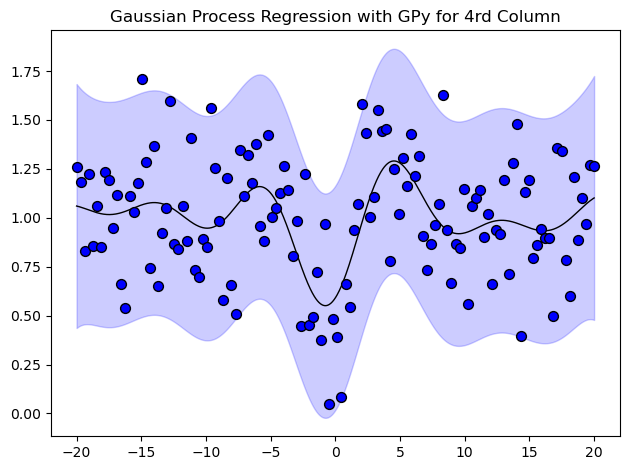

In [417]:

# EuF3_w2T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error_limit.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 3].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 4rd Column")
plt.tight_layout()
plt.show()

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   1.530002e+02           nan 
    00s00  0004   6.069696e+01   3.602824e+02 
    00s01  0008   4.921395e+01   2.869832e-01 
    00s01  0013   4.919830e+01   1.600998e-07 
    00s02  0015   4.919830e+01   1.440202e-10 
Runtime:     00s02
Optimization status: Converged



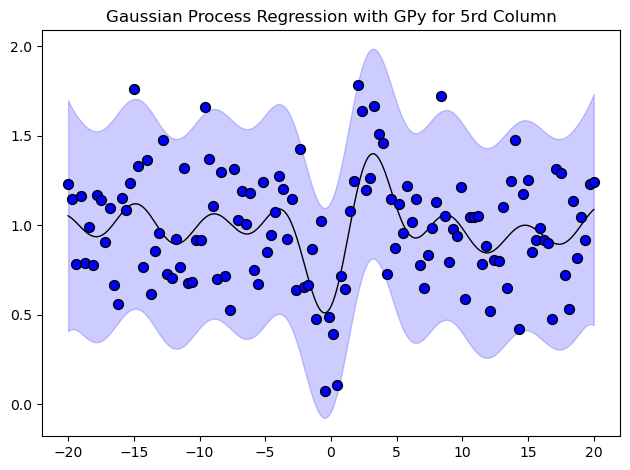

In [418]:
# EuF3_w3T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error_limit.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 4].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 5rd Column")
plt.tight_layout()
plt.show()

## すこしだけ標準偏差を弱める
縦軸の差を標準偏差の1/4にする

In [419]:
# CSVファイルを読み込む
data_path = '/home/mori/banzai/banzai_study/masuda/data.csv'
data = pd.read_csv(data_path)

In [420]:
# 正規ノイズをデータに加える

import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(0)

random0 = np.random.normal(loc = 0.0 , scale =  0.035, size = l)
random1 = np.random.normal(loc = 0.0 , scale =  0.15, size = l)

y1 = data['rEuF3_w0T7_8S5_85'] + random0
y2 = data['EuF3_w1T7_8S5_85'] + random1
y3 = data['EuF3_w2T7_8S5_85'] + random1
y4 = data['EuF3_w3T7_8S5_85'] + random1

In [421]:
import pandas as pd

data_error2 = pd.DataFrame({
    'Velocity (mm/s)'   : x,
    'rEuF3_w0T7_8S5_85' : y1,
    'EuF3_w1T7_8S5_85'  : y2,
    'EuF3_w2T7_8S5_85'  : y3,
    'EuF3_w3T7_8S5_85'  : y4,
})data

In [422]:
data_error2.to_csv('data_error2.csv', index=False)

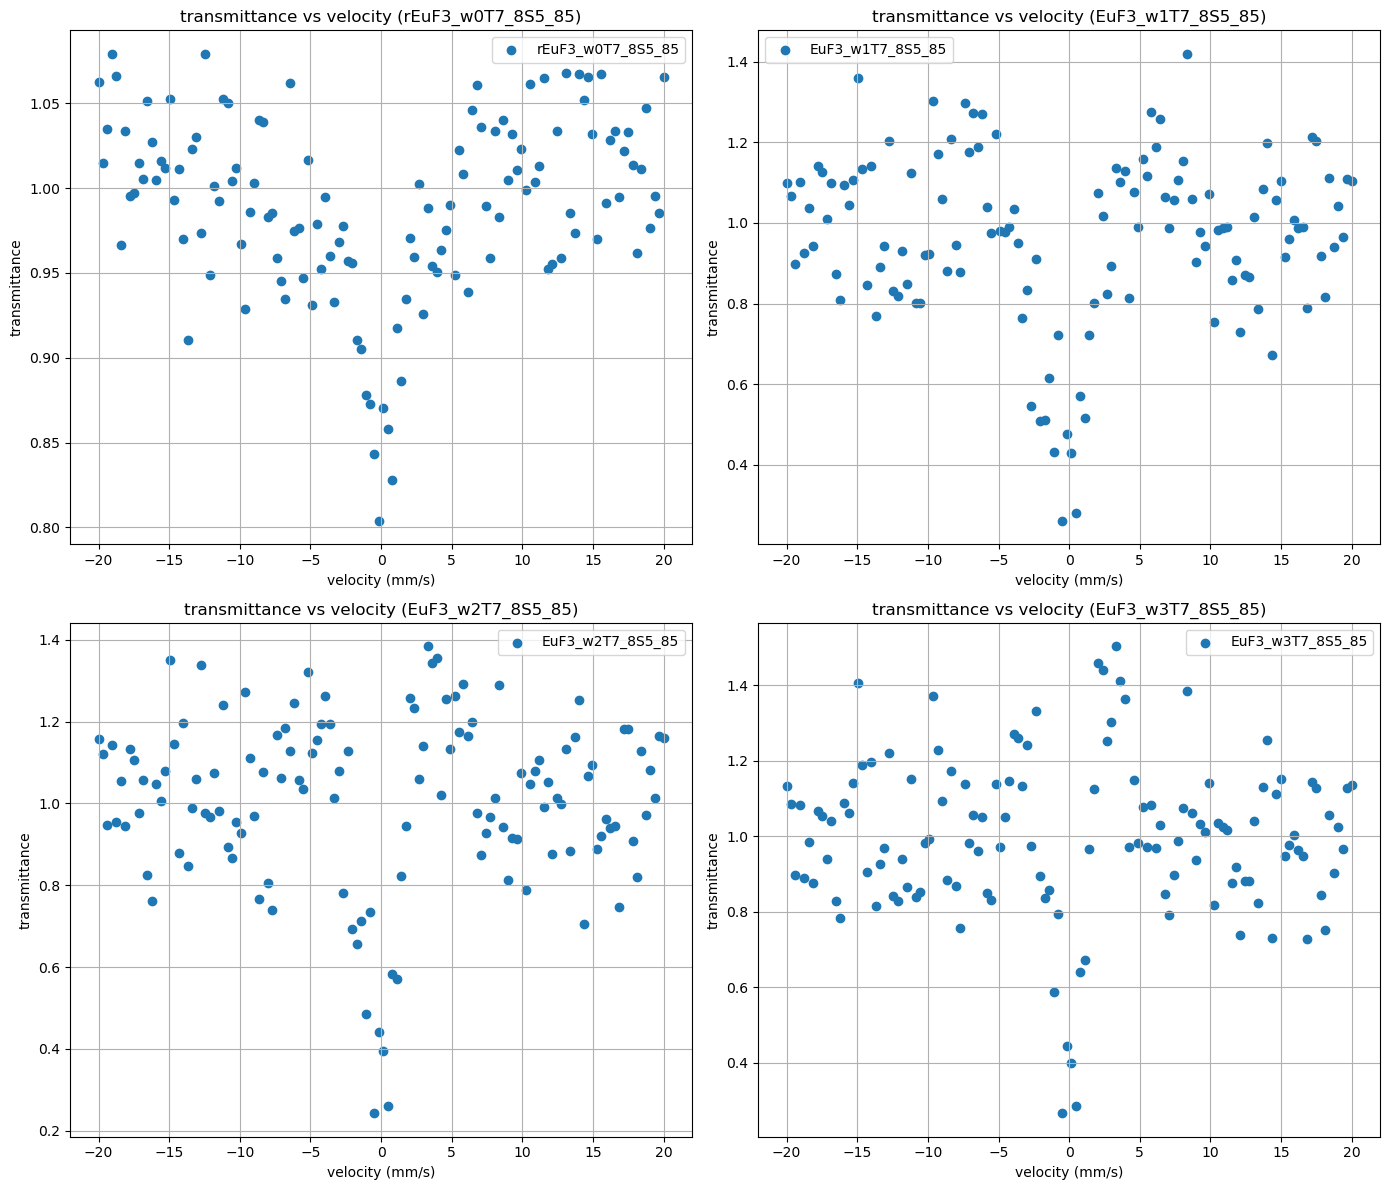

In [423]:
# 2列から5列までのデータをそれぞれ散布図でプロット
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.ravel()

for idx, column in enumerate(data_error2.columns[1:]):
    axes[idx].scatter(data_error2['Velocity (mm/s)'], data_error2[column], label=column)
    axes[idx].set_title(f'transmittance vs velocity ({column})')
    axes[idx].set_xlabel('velocity (mm/s)')
    axes[idx].set_ylabel('transmittance')
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()

### ガウス過程回帰で再現

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0004   5.382378e+06   2.855524e+12 
    00s01  0008  -1.998814e+02   1.122643e+02 
    00s01  0014  -2.081099e+02   1.405374e-01 
    00s02  0020  -2.081515e+02   8.438151e-08 
Runtime:     00s02
Optimization status: Converged



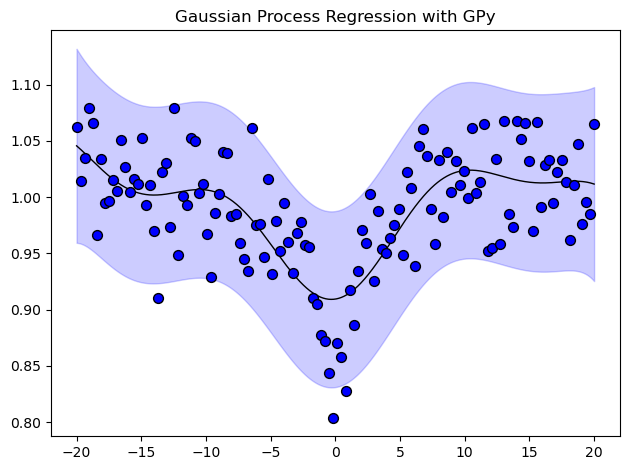

In [424]:
# rEuF3_w0T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error2.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy")
plt.tight_layout()
plt.show()

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s01  0009  -4.262764e+01   1.347058e+00 
    00s02  0015  -4.269410e+01   1.797341e-09 
Runtime:     00s02
Optimization status: Converged



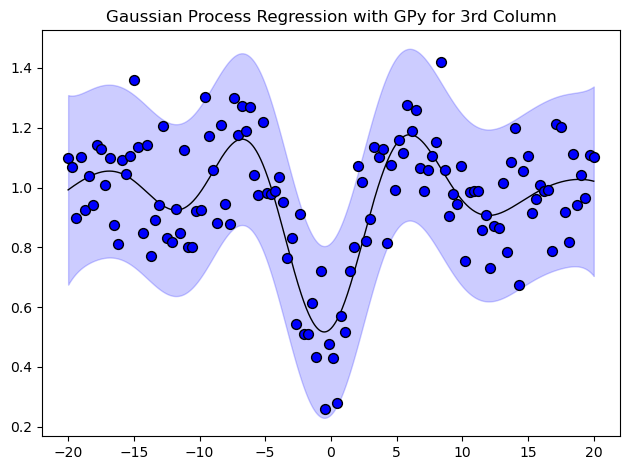

In [425]:
# EuF3_w1T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error2.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 2].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 3rd Column")
plt.tight_layout()
plt.show()

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0013  -3.390365e+01   1.613730e-10 
    00s03  0014  -3.390365e+01   1.613730e-10 
Runtime:     00s03
Optimization status: Converged



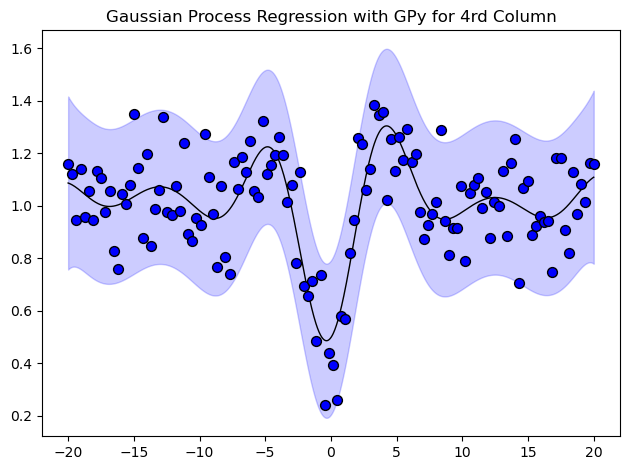

In [426]:
# EuF3_w2T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error2.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 3].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 4rd Column")
plt.tight_layout()
plt.show()

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0001   1.500711e+02   1.127499e+03 
    00s00  0005  -2.489278e+01   4.065939e+01 
    00s01  0009  -2.575724e+01   5.701095e-02 
    00s02  0013  -2.576498e+01   1.071187e-07 
    00s02  0015  -2.576498e+01   2.142527e-10 
Runtime:     00s02
Optimization status: Converged



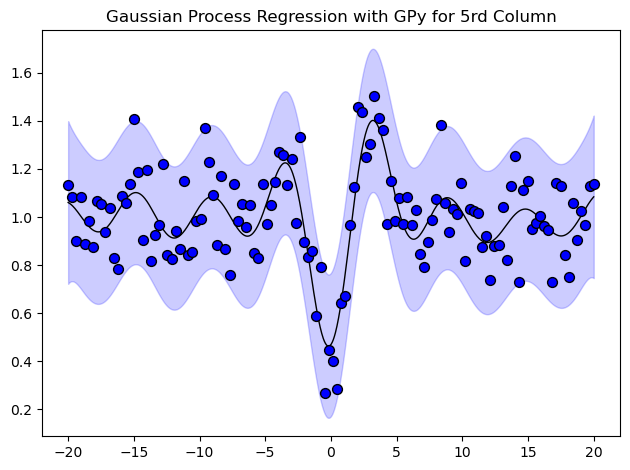

In [427]:

# EuF3_w3T7_8S5_85
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('/home/mori/banzai/banzai_study/masuda/data_error2.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 4].values.reshape(-1, 1)  # 3列目のデータを目的変数として使用

# ガウス過程モデルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X, y, kernel)

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_pred, var_pred = model.predict(X_pred)
y_pred = y_pred.ravel()
sigma = np.sqrt(var_pred).ravel()

# 結果のプロット
plt.figure()
plt.plot(X_pred, y_pred, 'k', lw=1)
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='b')
plt.scatter(X, y, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Gaussian Process Regression with GPy for 5rd Column")
plt.tight_layout()
plt.show()